## DC Neighborhoods - Capstone

### Import Packages

In [5]:
import pandas as pd
import numpy as np
import folium
from geopy.geocoders import Nominatim
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

### Upload Coordinate/Neighborhood Data

In [6]:
df = pd.read_csv('dc_neighborhoods.csv')
df

,Neighborhood,Zip,Latitude,Longitude
0,Shaw,20001,38.907711,-77.017320
1,H Street Corridor,20002,38.901811,-76.990970
2,Capitol Hill,20003,38.881762,-76.994470
3,"Downtown, Chinatown",20004,38.895268,-77.027600
4,Mt Vernon Triangle,20005,38.904461,-77.030880
...,...,...,...,...
56,Dupont Circle,20579,38.904311,-77.044649
57,Foggy Bottom,20586,38.902211,-77.047399
58,L'Enfant Plaza,20594,38.884940,-77.018372
59,Gateway,20022,38.918560,-76.961414


### Get Coordinates DC

In [7]:
address = 'Washington, DC'

geolocator = Nominatim(user_agent="DC")
location = geolocator.geocode(address)
latitude_dc = location.latitude
longitude_dc = location.longitude
print('The geograpical coordinate of Washington, DC are {}, {}.'.format(latitude_dc, longitude_dc))

The geograpical coordinate of Washington, DC are 38.8949855, -77.0365708.


### Create Map of DC

In [8]:
map_dc = folium.Map(location=[latitude_dc, longitude_dc], zoom_start=10)

# add markers to map
for lat, lng, Neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dc)  
    
map_dc

### Define Foursquare Credentials

In [9]:
CLIENT_ID = 'SRLY14ZNRWBDPI4MVMO0NDUY5ANDISOI3X3441XJQYDKGFNC'
CLIENT_SECRET = 'JSH2S0P5VZSXZCDQK3S0T5NB3501DI3IZWSXHLV33ZNPX41G'
VERSION = '20180604'

### Get Neighborhood Coordinates

In [10]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Shaw are 38.907711, -77.01732.


### Create and Send GET Request

In [11]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=SRLY14ZNRWBDPI4MVMO0NDUY5ANDISOI3X3441XJQYDKGFNC&client_secret=JSH2S0P5VZSXZCDQK3S0T5NB3501DI3IZWSXHLV33ZNPX41G&v=20180604&ll=38.907711,-77.01732&radius=500&limit=100'

### Explore DC Neighborhoods

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Create Venue Dataframe

In [13]:
dc_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Shaw
H Street Corridor
Capitol Hill
Downtown, Chinatown
Mt Vernon Triangle
Georgetown
Woodley Park, Forest Hills
Adams Morgan
Park View, Mount Pleasant
Brightwood
Shepherd Park
East End
Chevy Chase
Cathedral Heights
Brookland
Langdon
Benning Heights
Southeast Washington
Southwest Waterfront
Congress Heights
Dupont Circle
Foggy Bottom
Foggy Bottom
Mt Vernon Square
Pleasant Plains
Dupont Circle
University Heights
L'Enfant Plaza
Capitol Hill
Southwest Washington
National Mall
National Mall
McMillan
Southwest Waterfront
Joint Base Anacostia-Bolling
Joint Base Anacostia-Bolling
Congress Heights
Blue Plains
Navy Yard
East End
L'Enfant Plaza
Georgetown
Kalorama Heights
Columbia Heights
L'Enfant Plaza
Southwest Washington
Foggy Bottom
Foggy Bottom
East End
Sursum Corda
Capitol Hill
Petworth
National Mall
National Mall
Foggy Bottom
Chinatown
Dupont Circle
Foggy Bottom
L'Enfant Plaza
Gateway
Carver


In [14]:
dc_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Shaw,38.907711,-77.01732,Saint's Paradise Cafeteria,38.905810,-77.020216,Southern / Soul Food Restaurant
1,Shaw,38.907711,-77.01732,Beau Thai,38.909882,-77.022019,Thai Restaurant
2,Shaw,38.907711,-77.01732,Compass Coffee,38.910569,-77.021703,Coffee Shop
3,Shaw,38.907711,-77.01732,Giant Food,38.908984,-77.022755,Grocery Store
4,Shaw,38.907711,-77.01732,Ivy and Coney,38.910646,-77.021692,Dive Bar
5,Shaw,38.907711,-77.01732,Unleashed by Petco,38.910073,-77.022046,Pet Store
6,Shaw,38.907711,-77.01732,Bundy Dog Park,38.909506,-77.017807,Dog Run
7,Shaw,38.907711,-77.01732,Primal Fitness,38.905880,-77.014334,Gym
8,Shaw,38.907711,-77.01732,Popeyes Louisiana Kitchen,38.907921,-77.021408,Fried Chicken Joint
9,Shaw,38.907711,-77.01732,Bread for the City,38.910201,-77.021844,Building


In [15]:
print(dc_venues.shape)
dc_venues.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(dc_venues['Venue Category'].unique())))

(2643, 7)
There are 282 uniques categories.


### Analyze Each Neighborhood

In [16]:
dc_onehot = pd.get_dummies(dc_venues[['Venue Category']], prefix="", prefix_sep="")
dc_onehot.insert(loc=0, column='Neighborhood', value=dc_venues['Neighborhood'] )
dc_onehot.shape

(2643, 283)

In [17]:
dc_grouped = dc_onehot.groupby('Neighborhood').mean().reset_index()
dc_grouped

,Neighborhood,Acupuncturist,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,Adams Morgan,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,Benning Heights,0.000000,0.000000,0.076923,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,Blue Plains,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,Brightwood,0.000000,0.000000,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,Brookland,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,Capitol Hill,0.000000,0.000000,0.032258,0.00,0.016129,0.008065,0.000000,0.008065,0.000000,...,0.000000,0.000000,0.008065,0.000000,0.008065,0.000000,0.000000,0.00000,0.000000,0.008065
6,Carver,0.000000,0.000000,0.031250,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03125,0.000000,0.000000
7,Cathedral Heights,0.000000,0.000000,0.000000,0.00,0.000000,0.076923,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,Chevy Chase,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,Chinatown,0.000000,0.000000,0.030000,0.00,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [18]:
num_top_venues = 5

for hood in dc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dc_grouped[dc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams Morgan----
                       venue  freq
0  Latin American Restaurant  0.05
1                     Bakery  0.04
2                        Bar  0.04
3                      Diner  0.04
4                Pizza Place  0.04


----Benning Heights----
                 venue  freq
0    Convenience Store  0.08
1       Breakfast Spot  0.08
2  American Restaurant  0.08
3                 Park  0.08
4              Parking  0.08


----Blue Plains----
          venue  freq
0    Food Court  0.14
1   Post Office  0.14
2           Gym  0.14
3  Intersection  0.14
4    Food Truck  0.14


----Brightwood----
                    venue  freq
0             Pizza Place  0.12
1      Chinese Restaurant  0.06
2                    Café  0.06
3  Thrift / Vintage Store  0.06
4       Mobile Phone Shop  0.06


----Brookland----
                      venue  freq
0                 Gastropub  0.05
1      Ethiopian Restaurant  0.05
2                  Pharmacy  0.05
3            Boarding House  0.05
4  Bike Rent

### Create Most Common Venue Dataframe

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dc_grouped['Neighborhood']

for ind in np.arange(dc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams Morgan,Latin American Restaurant,Vietnamese Restaurant,Park,Pizza Place,Ethiopian Restaurant,Bar,Bakery,Diner,Taco Place,Cocktail Bar
1,Benning Heights,Shop & Service,Gas Station,Parking,Park,Seafood Restaurant,Dry Cleaner,Donut Shop,Sandwich Place,Breakfast Spot,Convenience Store
2,Blue Plains,Intersection,Food Truck,Food Court,Sandwich Place,Hotel,Gym,Post Office,Yoga Studio,Fast Food Restaurant,Exhibit
3,Brightwood,Pizza Place,Sandwich Place,Fast Food Restaurant,Big Box Store,Coffee Shop,Bus Stop,Mexican Restaurant,Chinese Restaurant,Mobile Phone Shop,Historic Site
4,Brookland,Gas Station,Bar,Rental Car Location,Convenience Store,Pharmacy,Ethiopian Restaurant,Spa,Business Service,Gastropub,Grocery Store


### Cluster Neighborhoods

In [21]:
dc_grouped_clustering = dc_grouped.drop('Neighborhood', 1)

In [22]:
distortions = []
K = range(1,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dc_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

### Configure Elbow Method

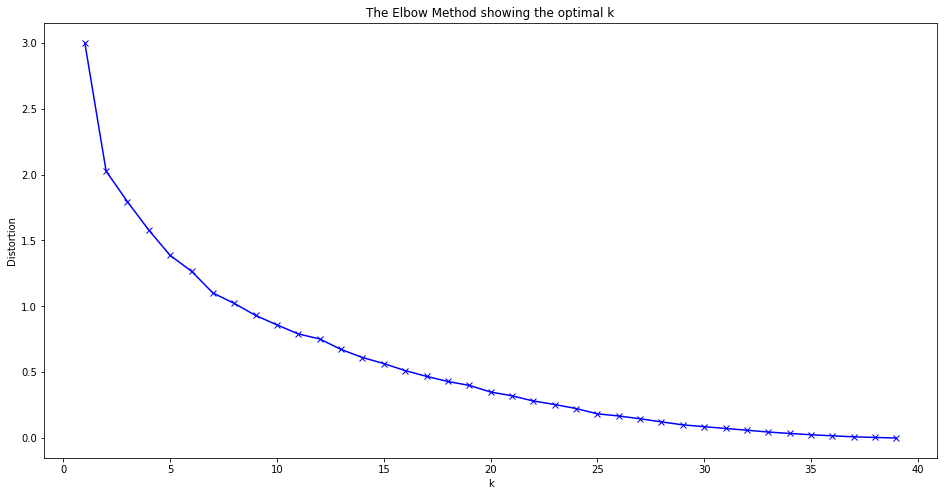

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### K-means Cluster Analysis

In [24]:
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 1,  4, 10,  0,  1,  4,  9,  4,  3,  4], dtype=int32)

In [25]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dc_merged = df

# merge dc_grouped with df to add latitude/longitude for each neighborhood
dc_merged = dc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dc_merged.head() # check the last columns!

,Neighborhood,Zip,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shaw,20001,38.907711,-77.01732,8,Intersection,Grocery Store,Gym / Fitness Center,Dive Bar,Dog Run,Coffee Shop,Pet Store,Southern / Soul Food Restaurant,Fried Chicken Joint,Thai Restaurant
1,H Street Corridor,20002,38.901811,-76.99097,1,Art Gallery,Pizza Place,Bar,Convenience Store,Liquor Store,Bike Rental / Bike Share,Cocktail Bar,Wine Bar,Taco Place,Asian Restaurant
2,Capitol Hill,20003,38.881762,-76.99447,4,Historic Site,Food Truck,American Restaurant,Pizza Place,Café,Monument / Landmark,Sushi Restaurant,Bar,Hotel,Taco Place
3,"Downtown, Chinatown",20004,38.895268,-77.02760,4,Hotel,American Restaurant,Coffee Shop,Science Museum,Exhibit,Sandwich Place,History Museum,Art Museum,Theater,Museum
4,Mt Vernon Triangle,20005,38.904461,-77.03088,4,Hotel,Coffee Shop,Sandwich Place,Salon / Barbershop,Hotel Bar,Italian Restaurant,Gym / Fitness Center,Latin American Restaurant,Sushi Restaurant,Deli / Bodega


### Create Map

In [26]:
map_clusters = folium.Map(location=[latitude_dc, longitude_dc], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dc_merged['Latitude'], dc_merged['Longitude'], dc_merged['Neighborhood'], dc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [27]:
dc_merged.loc[dc_merged['Cluster Labels'] == 0, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Brightwood,Pizza Place,Sandwich Place,Fast Food Restaurant,Big Box Store,Coffee Shop,Bus Stop,Mexican Restaurant,Chinese Restaurant,Mobile Phone Shop,Historic Site


In [28]:
dc_merged.loc[dc_merged['Cluster Labels'] == 1, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,H Street Corridor,Art Gallery,Pizza Place,Bar,Convenience Store,Liquor Store,Bike Rental / Bike Share,Cocktail Bar,Wine Bar,Taco Place,Asian Restaurant
6,"Woodley Park, Forest Hills",Italian Restaurant,Thai Restaurant,Mediterranean Restaurant,Mexican Restaurant,Steakhouse,Grocery Store,Liquor Store,Gift Shop,Supplement Shop,Deli / Bodega
7,Adams Morgan,Latin American Restaurant,Vietnamese Restaurant,Park,Pizza Place,Ethiopian Restaurant,Bar,Bakery,Diner,Taco Place,Cocktail Bar
8,"Park View, Mount Pleasant",Bar,Bakery,Café,Pizza Place,Asian Restaurant,Filipino Restaurant,Mexican Restaurant,Shipping Store,Seafood Restaurant,Beer Garden
14,Brookland,Gas Station,Bar,Rental Car Location,Convenience Store,Pharmacy,Ethiopian Restaurant,Spa,Business Service,Gastropub,Grocery Store
15,Langdon,Park,Ice Cream Shop,Martial Arts School,Men's Store,Gas Station,Fried Chicken Joint,Bus Stop,Paper / Office Supplies Store,Chinese Restaurant,Clothing Store
24,Pleasant Plains,Bar,Pizza Place,Sandwich Place,Gym,Gay Bar,New American Restaurant,Hookah Bar,Thai Restaurant,Nightclub,Cocktail Bar
26,University Heights,Pizza Place,Coffee Shop,Spa,Sandwich Place,Art Gallery,Bookstore,Breakfast Spot,Ethiopian Restaurant,Martial Arts School,College Cafeteria
32,McMillan,Cafeteria,Coffee Shop,Ethiopian Restaurant,Salon / Barbershop,College Basketball Court,Chinese Restaurant,Liquor Store,Pizza Place,Bar,Vegetarian / Vegan Restaurant
42,Kalorama Heights,Italian Restaurant,Massage Studio,Spa,Asian Restaurant,Bar,Bookstore,Cocktail Bar,Grocery Store,Thai Restaurant,Hotel


In [29]:
dc_merged.loc[dc_merged['Cluster Labels'] == 2, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Southeast Washington,Fried Chicken Joint,Yoga Studio,Food & Drink Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Food Court


In [30]:
dc_merged.loc[dc_merged['Cluster Labels'] == 3, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Chevy Chase,Athletics & Sports,Grocery Store,Recreation Center,Farmers Market,Fast Food Restaurant,Flea Market,Eye Doctor,Falafel Restaurant,Filipino Restaurant,Fish Market


In [31]:
dc_merged.loc[dc_merged['Cluster Labels'] == 4, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Capitol Hill,Historic Site,Food Truck,American Restaurant,Pizza Place,Café,Monument / Landmark,Sushi Restaurant,Bar,Hotel,Taco Place
3,"Downtown, Chinatown",Hotel,American Restaurant,Coffee Shop,Science Museum,Exhibit,Sandwich Place,History Museum,Art Museum,Theater,Museum
4,Mt Vernon Triangle,Hotel,Coffee Shop,Sandwich Place,Salon / Barbershop,Hotel Bar,Italian Restaurant,Gym / Fitness Center,Latin American Restaurant,Sushi Restaurant,Deli / Bodega
5,Georgetown,Italian Restaurant,Hotel,Coffee Shop,Grocery Store,American Restaurant,French Restaurant,Asian Restaurant,Pizza Place,Hotel Bar,Cosmetics Shop
11,East End,Food Truck,Hotel,Sandwich Place,Monument / Landmark,Café,Park,Deli / Bodega,Scenic Lookout,Coffee Shop,Gym / Fitness Center
13,Cathedral Heights,Coffee Shop,Student Center,Bagel Shop,Burger Joint,Park,Tennis Court,Shipping Store,College Cafeteria,Sandwich Place,Bank
16,Benning Heights,Shop & Service,Gas Station,Parking,Park,Seafood Restaurant,Dry Cleaner,Donut Shop,Sandwich Place,Breakfast Spot,Convenience Store
18,Southwest Waterfront,Theater,Hotel,Harbor / Marina,Park,Music Venue,Mexican Restaurant,Fish Market,Seafood Restaurant,Coffee Shop,Ice Cream Shop
20,Dupont Circle,Coffee Shop,Sandwich Place,Hotel,Salad Place,American Restaurant,Pizza Place,Yoga Studio,Hotel Bar,Mediterranean Restaurant,Thai Restaurant
21,Foggy Bottom,Hotel,Sandwich Place,Coffee Shop,Pizza Place,American Restaurant,Vegetarian / Vegan Restaurant,Bakery,Café,Performing Arts Venue,Indian Restaurant


In [32]:
dc_merged.loc[dc_merged['Cluster Labels'] == 5, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Congress Heights,Health & Beauty Service,Gym,Baseball Field,Park,Yoga Studio,Fish Market,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant
36,Congress Heights,Health & Beauty Service,Gym,Baseball Field,Park,Yoga Studio,Fish Market,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant


In [33]:
dc_merged.loc[dc_merged['Cluster Labels'] == 6, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Joint Base Anacostia-Bolling,Playground,Park,Donut Shop,Baseball Field,Post Office,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market
35,Joint Base Anacostia-Bolling,Playground,Park,Donut Shop,Baseball Field,Post Office,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market


In [34]:
dc_merged.loc[dc_merged['Cluster Labels'] == 7, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Gateway,Thrift / Vintage Store,Gas Station,Wine Shop,Shipping Store,Liquor Store,Home Service,Yoga Studio,Fast Food Restaurant,Eye Doctor,Falafel Restaurant


In [35]:
dc_merged.loc[dc_merged['Cluster Labels'] == 8, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shaw,Intersection,Grocery Store,Gym / Fitness Center,Dive Bar,Dog Run,Coffee Shop,Pet Store,Southern / Soul Food Restaurant,Fried Chicken Joint,Thai Restaurant


In [36]:
dc_merged.loc[dc_merged['Cluster Labels'] == 9, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Shepherd Park,Fast Food Restaurant,Donut Shop,Convenience Store,Pizza Place,Liquor Store,Caribbean Restaurant,Bank,Gym,Wings Joint,Bus Station
60,Carver,Fast Food Restaurant,Liquor Store,Pizza Place,Sandwich Place,Light Rail Station,Park,Pool,Pharmacy,Women's Store,Grocery Store


In [37]:
dc_merged.loc[dc_merged['Cluster Labels'] == 10, dc_merged.columns[[0] + list(range(5, dc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Blue Plains,Intersection,Food Truck,Food Court,Sandwich Place,Hotel,Gym,Post Office,Yoga Studio,Fast Food Restaurant,Exhibit
